# Representation of configuration, velocity, and forces  
Note that:
- We will use implicit representations of configurations, considering that the C-space is a manifold embedded in a higher-dimensional space. In other words, our representation of a configuration will not use minimum set of coordinates and the velocity will not be represented by a vector in the tangent space.
- Rigid bodies configurations are represented using frames. A frame consist of an origin and a set of three orthogonal x, y, and z axes. All frames are right-handed, which means that the cross product of the x and y axes is the z axis. It can be created using your right hand, where the thumb points in the direction of the z axis, the index finger in the direction of the x axis, and the middle finger in the direction of the y axis.

<div style="text-align:center"> <img src="images\Cartesian-axes-right-hand-rule.svg" width="400"/> <br/> source <a href="https://commons.wikimedia.org/wiki/File%253ACartesian-axes-right-hand-rule.svg">Wikimedia</a> </div>

- If we want to represent the position and orientation of a rigid body, we can use a frame attached to the body and attach another frame to the world. The configuration of the body is given by the position of the origin of the body frame with respect to the origin of the world frame and the orientation of the body frame with respect to the world frame. 

- Positive rotations about an axis is defined by the right-hand rule. If you point your right thumb in the direction of the axis, the curl of your fingers will indicate the direction of the positive rotation.

<div style="text-align:center"> <img src="images\Right-hand_grip_rule.svg" width="400"/> <br/> source <a href="https://commons.wikimedia.org/wiki/File%253ARight-hand_grip_rule.svg">Wikimedia</a> </div>



## Rotation Matrices

### Orientation of a Rigid Body

When studying the orientation of a rigid body, we compare two frames, the "space frame" ({s}) and the "body frame" ({b}). We're mainly interested in how the body frame is rotated compared to the space frame.

### Rotation Matrix

To represent the orientation of the body frame relative to the space frame, we use a special table called a "rotation matrix." This matrix contains 9 numbers that describe how the body frame's x, y, and z-coordinate axes are aligned in the space frame.

Here how it looks like:

$$
R_{sb} =
\begin{bmatrix} 
    \hat{x}_b \ \hat{y}_b \ \hat{z}_b
\end{bmatrix} =
\begin{bmatrix}
    \hat{x}_s \cdot \hat{x}_b & \hat{y}_s \cdot \hat{x}_b & \hat{z}_s \cdot \hat{x}_b \\
    \hat{x}_s \cdot \hat{y}_b & \hat{y}_s \cdot \hat{y}_b & \hat{z}_s \cdot \hat{y}_b \\
    \hat{x}_s \cdot \hat{z}_b & \hat{y}_s \cdot \hat{z}_b & \hat{z}_s \cdot \hat{z}_b
\end{bmatrix} 
$$

$R_{sb}$ indicates the rotation matrix from the body frame to the space frame. Sometimes the two subscripts are implicit, and we just write $R$.



### Constraints

The 9 numbers in the rotation matrix must follow specific rules or "constraints" to make sense. Since we know that the space of orientation is three-dimensional, we expect that there are 6 constraints.
These constraints are:

    - The three column vectors in the matrix (representing the x, y, and z-axes of the body frame) must be "unit vectors," with a length of 1.
    - The dot product of any two of the column vectors must be zero, meaning the three vectors are perpendicular (orthogonal) to each other.

These 6 constrains can be written compactly as:

$$
R^T R = I, I =
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

where $I$ is the identity matrix.

These constrains ensure that determinant of $R$ is either 1, corresponding to a "right-handed" rotation, or -1, corresponding to a "left-handed" rotation. We're only interested in right-handed rotations in this notebook, so we'll only consider rotation matrices with a determinant of 1.

### Special Orthogonal Group (SO(3))

All the valid rotation matrices satisfying the constraints form a special group known as the "special orthogonal group" or SO(3). It includes all possible ways to rotate the body frame with respect to the space frame while maintaining the constraints.

$$
SO(3) = \{ R \in \mathbb{R}^{3 \times 3} \mid R^T R = I, \det(R) = 1 \}
$$

### Properties of Rotation Matrices

Rotation matrices have interesting properties:

- The inverse of a rotation matrix is its transpose, which means to undo a rotation, we use the transpose of the original matrix.
Inverse: $R^{-1} = R^T \in  SO(3)$
- Combining two rotation matrices (matrix multiplication) gives another rotation matrix, enabling us to represent complex rotations using simpler ones.  
Closure: $R_1, R_2 \in SO(3) \Rightarrow R_1 R_2 \in SO(3)$
- The order of multiplication matters; rotation matrices, in general, do not commute (A * B is not always the same as B * A).  
Associativity: $R_1, R_2, R_3 \in SO(3) \Rightarrow R_1 (R_2 R_3) = (R_1 R_2) R_3$
Not Commutative: $R_1, R_2 \in SO(3) \Rightarrow R_1 R_2 \neq R_2 R_1$
- When we use a rotation matrix to rotate a vector (a point in space), the vector's length remains unchanged. Only its direction changes, not its distance from the origin.  
$ x \in \mathbb{R}^3, R \in SO(3) \Rightarrow \| R x \| = \| x \|$

### Uses of Rotation Matrices
The rotation matrix is a very useful tool for representing and manipulating orientations of rigid bodies in 3D space. Here are some of its uses:

    - Representing an orientation.
    - Changing the frame of reference of a vector or frame.
    - Rotating a vector or frame.

### Representation of Orientation

We start by considering coordinate frames {s}, {b}, and {c}, representing the same space but with different orientations.

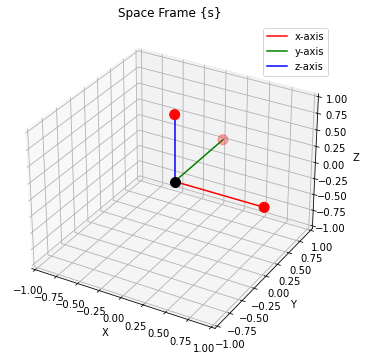

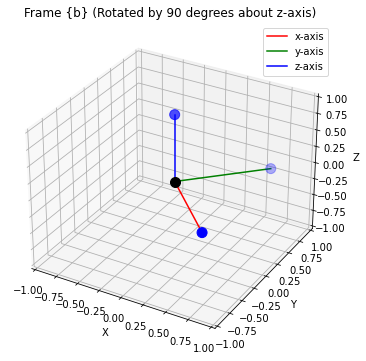

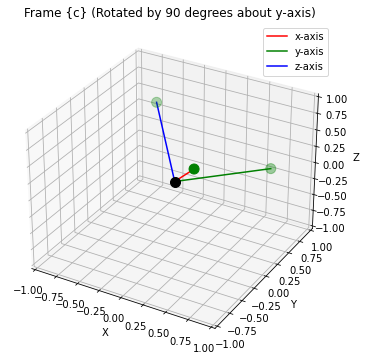

In [2]:
# Visualize Coordinates frames {s}, {b}, {c}
# {s} is the space frame
# {b} is the space frame rotated by 90 degrees about the z-axis
# {c} is the b frame rotated by 90 degrees about the y-axis
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 6

# Define the rotation matrices
def R_x(theta):
    R = np.array([[1, 0, 0],
                  [0, np.cos(theta), -np.sin(theta)],
                  [0, np.sin(theta), np.cos(theta)]])
    return R

def R_y(theta):
    R = np.array([[np.cos(theta), 0, np.sin(theta)],
                  [0, 1, 0],
                  [-np.sin(theta), 0, np.cos(theta)]])
    return R

def R_z(theta):
    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])
    return R

# Define the rotation angles
theta_x = np.pi / 4
theta_y = np.pi / 4
theta_z = np.pi / 4

# Define the rotation matrices
R_x = R_x(theta_x)
R_y = R_y(theta_y)
R_z = R_z(theta_z)

# Define the space frame
s = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

# Define the b coordinate frame
b = np.dot(R_z, s)
# Define the c coordinate frame
c = np.dot(R_y, b)

# Define the points
p = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

# Function to plot the coordinate frame
def plot_frame(frame, color, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the origin
    ax.scatter(0, 0, 0, color='k', marker='o', s=100)

    # Plot the end points of the axes
    p_frame = np.dot(frame, p.T)
    ax.scatter(p_frame[:, 0], p_frame[:, 1], p_frame[:, 2], color=color, marker='o', s=100)
    

    # Plot the coordinate axes
    # x red, y green, z blue
    ax.plot([0, frame[0, 0]], [0, frame[0, 1]], [0, frame[0, 2]], color='r', label='x-axis')
    ax.plot([0, frame[1, 0]], [0, frame[1, 1]], [0, frame[1, 2]], color='g', label='y-axis')
    ax.plot([0, frame[2, 0]], [0, frame[2, 1]], [0, frame[2, 2]], color='b', label='z-axis')

    # Set the axes properties
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()

# Plot the frames
plot_frame(s, 'r', 'Space Frame {s}')
plot_frame(b, 'b', 'Frame {b} (Rotated by 90 degrees about z-axis)')
plot_frame(c, 'g', 'Frame {c} (Rotated by 90 degrees about y-axis)')

plt.show()


Initially, the frame is aligned with {s}, and after successive rotations, we obtain the frames {b} and {c}.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

#### Rotation Matrices for Frame Orientation

To represent {c} relative to {s}, we use the coordinate axes of {c} in {s} coordinates, yielding the rotation matrix R_sc.

$$
R_{sc} = 
\begin{bmatrix}
    0 & -1 & 0 \\
    0 & 0 & -1 \\
    1 & 0 & 0
\end{bmatrix}
$$

The rotation matrix R_cs, representing the orientation of frame {s} in {c} coordinates, is the transpose (or inverse) of R_sc.

$$
R_{cs} = R_{sc}^{T} = R_{sc}^{-1} = 
\begin{bmatrix}
    0 & 0 & 1 \\
    -1 & 0 & 0 \\
    0 & -1 & 0
\end{bmatrix}


### Changing the Frame of Reference of a Vector or Frame

To demonstrate changing the reference frame, consider the rotation matrix R_bc, representing the orientation of frame {c} in frame {b} coordinates.

$$
R_{bc} =
\begin{bmatrix}
    0 & 0 & -1 \\
    0 & 1 & 0 \\
    1 & 0 & 0
\end{bmatrix}
$$

We can express the {c} frame in {s} coordinates instead of {b} coordinates by performing the matrix multiplication R_sc = R_sb * R_bc.

$$
R_{sc} = R_{s\cancel b} R_{\cancel bc} = 
\begin{bmatrix}
    0 & -1 & 0 \\
    0 & 0 & -1 \\
    1 & 0 & 0
\end{bmatrix}
$$

Remember the subscript cancellation rule: If the second subscript of the first matrix matches the first subscript of the second matrix, they cancel each other, leaving the two remaining subscripts in the right order.

We can also change the reference frame of a vector by multiplying it by a rotation matrix. For example, if we have a vector v expressed in {b} coordinates, we can express it in {s} coordinates by multiplying it by R_sb.
$$
v_b = 
\begin{bmatrix}
    -1 \\
    0 \\
    0
\end{bmatrix}
$$
$$
v_s = R_{s \cancel b} v_{\cancel b} =
\begin{bmatrix}
    0  \\
    -1 \\
    0
\end{bmatrix}
$$


### Rotating a Frame or Vector

A rotation matrix can also be used to rotate a vector or frame.
#### Rotating a Frame

Consider two coordinate frames, {s} (space frame) and {b} (frame obtained from {s} by rotating about the z-axis by 90 degrees). We can represent the {b} frame relative to the {s} frame using the rotation matrix R_sb, which describes the orientation change from {s} to {b}. When we rotate the {s} frame about its z-axis by 90 degrees, we get the {b} frame. So, R_sb is an operation that rotates vectors by 90 degrees about the z-axis.

$$
R_{sb} = R = Rot(\hat{z}, 90\degree)
$$

#### Rotating a Vector

If we have a vector p_b expressed in the {b} frame, we can convert it to the {s} frame by premultiplying it with the rotation matrix R_sb. This process is essentially a change of reference frame from {b} to {s} coordinates. However, if we have a vector p_s expressed in the {s} frame and we premultiply it with R_sb, there is no subscript cancellation. Instead, we get a new vector p-prime-s, obtained by rotating p_s by 90 degrees about the z-axis of the {s} frame.
$$
 p\prime _{s} = R_{ps}
$$

Similarly, we can rotate an entire coordinate frame, like frame {c}, by premultiplying or postmultiplying R_sc by the rotation operator R. If we premultiply R_sc by R, the rotation axis is interpreted as the z-axis of the first subscript, which is {s}. We obtain a new rotated frame {c-prime} still expressed in {s} coordinates. If we postmultiply R_sc by R, the rotation axis is interpreted as the z-axis of the second subscript, which is {c}. This results in a different rotated frame {c-double-prime} still expressed in {s} coordinates.

$$
R = Rot(\hat{z}, 90\degree)
$$

premultiplication:
$$
R_{sc\prime}  = R R_{sc}
$$

postmultiplication:
$$
R_{sc\prime\prime} = R_{sc} R
$$

## Angular Velocity

Let's consider the rotation matrix R, which represents the orientation of the {b} frame relative to the {s} frame. We can define the rate of rotation of {b}, also known as the angular velocity, as the time rate of change of R, denoted as R-dot. However, this representation has 9 variables, and we aim to find a more compact representation using only 3 variables.

$$ 
R = orientation(b, s) \\
\dot{R} = \frac{dR}{dt} = \frac{d}{dt} orientation(b, s)
$$



### Flat Vector Space of Angular Velocities
    Unlike the curved space of orientations, SO(3) (represented as a sphere), the space of angular velocities is a flat 3-dimensional vector space tangent to SO(3) at a specific orientation.


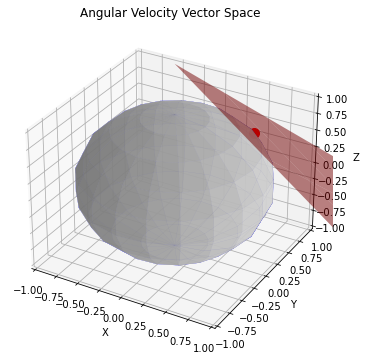

In [21]:
# Representing the flat vector space of Angular Velocity
# ploting a sphere with a square tangent in 3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 6

# Define the sphere
r = 1
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = r*np.cos(u)*np.sin(v)
y = r*np.sin(u)*np.sin(v)
z = r*np.cos(v)

# Define the tangent plane
point = np.array([1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)])
normal = np.array([1, 1, 1])
d = -point.dot(normal)
xx, yy = np.meshgrid(range(10), range(10))
z_tangent = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# Plot the sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, color='b', rstride=1, cstride=1, linewidth=0.2)
ax.plot_surface(x, y, z, color='w', alpha=0.5)
ax.plot_surface(x, y, -z, color='w', alpha=0.5)

# Plot the point
ax.scatter(point[0], point[1], point[2], color='r', marker='o', s=100)


# Plot the tangent plane
ax.plot_surface(xx, yy, z_tangent, color='r', alpha=0.5)

# Set the axes properties
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Angular Velocity Vector Space')

plt.show()



### Representing Angular Velocity using a Rotation Axis
    Any angular velocity can be represented by a rotation axis passing through the origin and the speed of rotation around that axis following the right-hand rule. We can express the axis as a unit vector in the {s} frame, denoted as omega-hat_s. The hat symbol indicates that the vector has a unit length. The rate of rotation is denoted as theta-dot. By multiplying the unit axis omega-hat_s with the rate of rotation theta-dot, we obtain the angular velocity vector omega_s, expressed in the {s} frame.

$$
\omega_s = \theta \hat{\omega}_s
$$



### Calculating Linear Velocity of Frame Axes

As the frame rotates about the axis, the x-axis of the {b} frame traces out a circle. The linear velocity of the x-axis is in a direction tangent to this circle and can be calculated using the cross product between omega_s and the x-hat_b (unit vector of the x-axis in the {b} frame). A similar relationship holds for the other two coordinate axes.

$$
\dot{\hat{x}_b} = \omega_s \times \hat{x}_b
\dot{\hat{y}_b} = \omega_s \times \hat{y}_b
\dot{\hat{z}_b} = \omega_s \times \hat{z}_b
$$
Skew-Symmetric Matrix Representation

We often take the cross product of a vector with another vector. To simplify this operation, we define a bracket notation, where the cross product of x and y is written as bracket-x times y. Here, bracket-x is a 3 by 3 matrix representation of the 3-vector x. This matrix, bracket-x, is known as a skew-symmetric matrix because it is equal to the negative of its transpose. The set of all 3 by 3 skew-symmetric matrices is denoted as little so(3), and it has a significant relationship with the space of rotation matrices (big SO(3)).

$$
x \times y = [x] y \\
x =
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix} \in \mathbb{R}^3,
[x] = 
\begin{bmatrix}
    0 & -x_3 & x_2 \\
    x_3 & 0 & -x_1 \\
    -x_2 & x_1 & 0
\end{bmatrix} 
$$
$$
[x] = -[x]^T \in so(3)
$$

Using the bracket notation, we can write the relationship between R-dot and the angular velocity omega_s as R-dot = bracket omega_s times R.
$$
\dot{R}_{sb} = [ \omega_s ] R_{sb}
$$

Angular Velocity in Different Frames

The angular velocity vector omega_s can be expressed in frames other than the {s} frame. For example, we could represent it in the {b} frame coordinates. Using the change of reference frame subscript cancellation rule, we find that omega_b equals R_bs times omega_s, or equivalently, R_sb inverse times omega_s.

$$
\omega_b = R^T \omega_s = R^{-1} \omega_s
$$
$$
\omega_s = R \omega_b
$$
$$
[ \omega_b ] = R^T \dot{R} = R^{-1} \dot{R}
$$
$$
[ \omega_s ] = \dot{R} R^T = \dot{R} R^{-1}
$$


## Exponential Coordinates of Rotation

In this section, we will explore the concept of exponential coordinates, which are an alternative representation of orientation, and their connection to matrix exponential in linear differential equations.


### Representing Orientation

1. **Rotation about a Unit Axis**:
   Any orientation can be achieved from an initial orientation aligned with the space frame by rotating about some unit axis by a specific angle. We represent the unit axis as omega-hat and the rotation angle as theta. By multiplying these two together, we obtain the 3-vector omega-hat theta. This 3-parameter representation is known as exponential coordinates, and it represents the orientation of one frame relative to another.

$$
\omega \in \mathbb{R}^3, \theta \in \mathbb{R} \\
\omega \theta = \omega \hat{\theta} \in \mathbb{R}^3
$$

2. **Exponential Coordinates vs. Rotation Matrix**:
   Exponential coordinates provide an alternative representation to a rotation matrix for expressing orientations.

3. **Connection to Linear Differential Equations**:
   The term "exponential" in exponential coordinates is connected to linear differential equations. We can view omega-hat as an angular velocity that is followed for theta seconds. To find the final orientation, we have to integrate the angular velocity from the initial orientation.
   


### Matrix Exponential

To better understand exponential coordinates and their relation to linear differential equations, let's look at a familiar problem in linear ordinary differential equations in a single variable: x-dot = a times x, where a is a constant. The solution to this scalar linear differential equation is e to the a t times x at time zero. Here, the exponential function e to the a t is defined by the series expansion.

$$
x \in \mathbb{R}, \dot{x} = a x (t) \to x(t) = e^{at} x(0)
$$
$$
e^{at} = 1 + at + \frac{(at)^2}{2!} + \frac{(at)^3}{3!} + \frac{(at)^4}{4!} + \cdots
$$

The concept of a matrix exponential is analogous to the scalar case but applied to a vector linear differential equation, where x is now an n-vector and A is a constant n by n matrix. The solution to this vector linear differential equation has the same form as the single-variable case. The term e to the A t is called a matrix exponential.

$$
x \in \mathbb{R}^n, \dot{x} = A x (t) \to x(t) = e^{At} x(0)
$$
$$
e^{At} = I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \frac{(At)^4}{4!} + \cdots
$$



## Matrix Exponential and Angular Velocity

The matrix exponential has a practical application in integrating angular velocity. In this context, the matrix A is the 3 by 3 skew-symmetric representation of the angular velocity. By leveraging the properties of matrix exponential, we can integrate the angular velocity to find the final orientation after a given time.



### Rotating Coordinate Axes

1. **Initial Frame**: We start with a frame of coordinate axes that will rotate about a unit angular velocity axis.

2. **Motion of Coordinate Axes**: To understand the motion of the coordinate axes, we focus on one of the coordinate axes, named vector p. As p rotates about the rotation axis, it traces out a circle.

3. **Determining Final Location**: We aim to determine the final location of vector p after it rotates an angle theta about the rotation axis.

<div style="text-align:center"> <img src="images\expo-cord-rotation.png" width="400"/> <br/> Source : Modern Robotics </div> 

### Differential Equation of Motion

1. **Differential Equation**: The motion of p is described by the differential equation p-dot = omega-hat cross p, where p-dot is the time derivative of p, and omega-hat is the unit angular velocity.

$$
\dot{p} = \omega \times p
$$

2. **Vector Differential Equation**: We can write this as a vector differential equation p-dot(t) = bracket(omega-hat) times p(t).

$$
\dot{p}(t) = [ \omega ] p(t)
$$


### Matrix Exponential

1. **Series Expansion**: The solution to the vector differential equation uses the matrix exponential. In general, a matrix exponential can be calculated using a series expansion.

$$
e^{At} = I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \frac{(At)^4}{4!} + \cdots
$$

2. **Closed Form**: For a 3 by 3 skew-symmetric matrix, like bracket(omega-hat), the matrix exponential has a simple closed form known as Rodrigues' formula. The formula is the 3 by 3 identity matrix plus sin(theta) times bracket(omega-hat) plus (1 - cos(theta)) times bracket(omega-hat) squared.

$$
e^{[ \omega ] t} = I + \sin(\theta) [ \omega ] + (1 - \cos(\theta)) [ \omega ]^2
$$

3. **Rodrigues' Formula**: Essentially, the matrix exponential integrates the angular velocity omega-hat for time theta seconds, going from the identity matrix to the final rotation matrix R.

$$
R = e^{[ \omega ] \theta}
$$

### Matrix Logarithm

1. **Inverse of Exponential**: We can define the inverse of the matrix exponential, known as the matrix logarithm. The matrix logarithm takes a rotation matrix R and returns the skew-symmetric matrix representation of the exponential coordinates that achieve it, starting from the identity orientation.

$$
\log(R) = [ \omega ] \theta
$$
2. **Usefulness**: The matrix exponential and logarithm will be useful when studying robot kinematics, where they help represent revolute joint motion.



## Homogeneous Transformation Matrices


A transformation matrix, denoted as T, is used to represent the configuration of a body frame {b} in the fixed space frame {s}. It consists of the position vector p of the frame {b} in {s} coordinates and the rotation matrix R specifying the orientation of {b} in {s} coordinates. The transformation matrix is a 4x4 matrix with the bottom row [0 0 0 1] included to simplify matrix operations.

$$
T = 
\begin{bmatrix}
    R & p \\
    0 & 1
\end{bmatrix}
$$

The set of all transformation matrices is called the special Euclidean group SE(3). Transformation matrices satisfy properties similar to rotation matrices, including having an inverse such that T times its inverse is the 4x4 identity matrix. The product of two transformation matrices is also a transformation matrix, and matrix multiplication is associative but not generally commutative.  
inverse:
$$
T^{-1} =
\begin{bmatrix}
    R & p \\
    0 & 1
\end{bmatrix}^{-1} =
\begin{bmatrix}
    R^T & -R^T p \\
    0 & 1
\end{bmatrix} \in SE(3)
$$
closure:
$$
T_1 T_2 \in SE(3)
$$
associativity:
$$
T_1 (T_2 T_3) = (T_1 T_2) T_3
$$
not commutative:
$$
T_1 T_2 \neq T_2 T_1
$$



**Applications of Transformation Matrices**:

   - **Representing a Rigid-Body Configuration**: A transformation matrix is used to represent the configuration of one frame relative to another. For example, to represent frame {b} relative to frame {s}, we construct the matrix T_sb consisting of the rotation matrix R_sb and the position p of the {b} frame origin in {s} frame coordinates. The representation of the {s} frame relative to the {b} frame is just the inverse, T_bs.
       
   
   - **Changing the Frame of Reference**: Transformation matrices are used to change the frame of reference of a vector or a frame. Using the subscript cancellation rule, we can multiply two transformation matrices to calculate the transformation between different frames. For example, if we know T_sb and T_bc, we can calculate T_sc representing the configuration of frame {c} in frame {s} by multiplying T_sb by T_bc. The inverse of T_sc is T_cs.

   $$
   T_{sc} = T_{s\cancel b} T_{\cancel bc}
   $$

   $$
   T_{cs} = T_{sc}^{-1} = T_{bc}^{-1} T_{sb}^{-1}
   $$

   we can also change the frame of reference of a point p in space. Let p_b and p_s be the representations of the point p in the {b} and {s} frames, respectively. We could naively try our subscript cancellation rule and multiply T_sb by p_b to get p_s. However, this is not a valid operation because of they have dimension mismatch. Instead, we can use the homogeneous transformation matrix to represent the point p in homogeneous coordinates, where the fourth coordinate is 1. We can then use the transformation matrix to change the frame of reference of the point p.

   $$
   \cancel{p_s = T_{s\cancel b} p_{\cancel b}}
   $$

   $$
   \begin{bmatrix}
       p_s \\
       1
   \end{bmatrix} = T_{s\cancel b}
   \begin{bmatrix}
       p_{\cancel b} \\
       1
   \end{bmatrix}
   $$
   
   - **Displacing a Vector or a Frame**: A transformation matrix can be used to displace a point or a frame. Any configuration can be achieved from the initial configuration by first rotating and then translating. The final configuration is given by T, which can be viewed not only as a configuration but also as the transformation that takes the identity matrix to T.


### Applying Transformation T on the Right

In this plots, the {b} frame will rotate 90 degrees about the z-axis of the {s} frame and then translate 2 units along the y-direction of the {s} frame.

$$
T = Trans(p) Rot(\omega, \theta) =
\begin{bmatrix}
    1 & 0 & 0 & p_x \\
    0 & 1 & 0 & p_y \\
    0 & 0 & 1 & p_z \\
    0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) & 0 & 0 \\
    \sin(\theta) & \cos(\theta) & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
\end{bmatrix}
$$


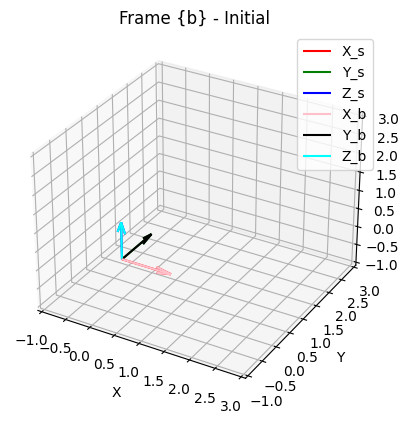

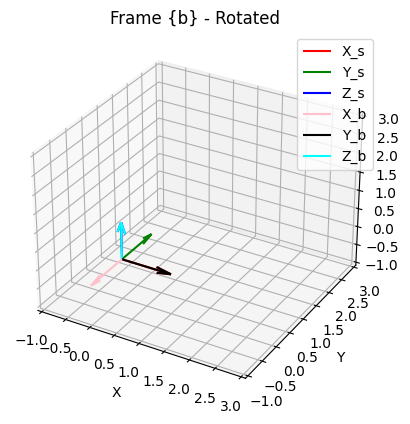

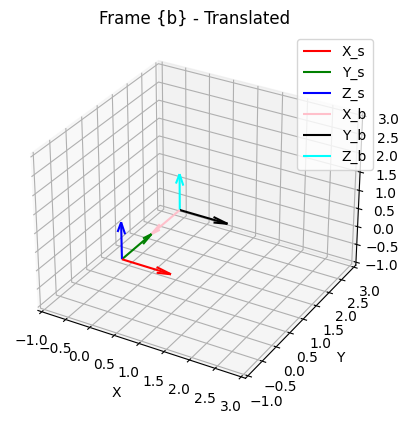

In [32]:
# Plotting the transformation T on the Right
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the translation vector p
p = np.array([0, 2, 0])

# Define the rotation angle in radians (90 degrees)
theta = np.pi / 2

# Define the unit rotation axis (z-axis)
omega_hat = np.array([0, 0, 1])

# Calculate the skew-symmetric representation of the rotation vector
omega_hat_skew = np.array([[0, -omega_hat[2], omega_hat[1]],
                           [omega_hat[2], 0, -omega_hat[0]],
                           [-omega_hat[1], omega_hat[0], 0]])

T = np.eye(4)
R = np.eye(3)
# Calculate the rotation matrix R_sb using Rodrigues' formula
R_sb = R + np.sin(theta) * omega_hat_skew + (1 - np.cos(theta)) * omega_hat_skew @ omega_hat_skew


# Function to plot a frame
def plot_frame(T, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Set the axis limits and labels
    ax.set_xlim3d(-1, 3)
    ax.set_ylim3d(-1, 3)
    ax.set_zlim3d(-1, 3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Plot the space frame {s}
    ax.quiver(0, 0, 0, 1, 0, 0, color='r', label='X_s')
    ax.quiver(0, 0, 0, 0, 1, 0, color='g', label='Y_s')
    ax.quiver(0, 0, 0, 0, 0, 1, color='b', label='Z_s')

    # Plot the frame {b} relative to {s}
    T_b = T[:3, :3]
    p_b = T[:3, 3]
    ax.quiver(p_b[0], p_b[1], p_b[2], T_b[0, 0], T_b[0, 1], T_b[0, 2], color='pink', label='X_b')
    ax.quiver(p_b[0], p_b[1], p_b[2], T_b[1, 0], T_b[1, 1], T_b[1, 2], color='black', label='Y_b')
    ax.quiver(p_b[0], p_b[1], p_b[2], T_b[2, 0], T_b[2, 1], T_b[2, 2], color='cyan', label='Z_b')

    # Set the title and legend
    ax.set_title(title)
    ax.legend()

    plt.show()

# Plot the initial frame {b}
plot_frame(T, 'Frame {b} - Initial')

# rotate the frame T by 90 degrees about the z-axis
T[:3, :3] = R_sb
# Plot the rotated frame {b}
plot_frame(T, 'Frame {b} - Rotated')

# translate the frame T by 2 units in the z-direction
T[:3, 3] = p
# Plot the translated frame {b}
plot_frame(T, 'Frame {b} - Translated')



### Applying Transformation T on the Left

In this plots, the {b} frame will first translate by 2 units in the y-direction of the {b} frame, then rotate about the z-axis of the {b} frame.                                                                                                                     

$$
T = Rot(\omega, \theta) Trans(p) 
$$

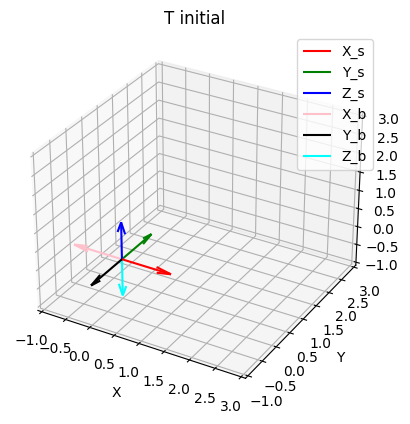

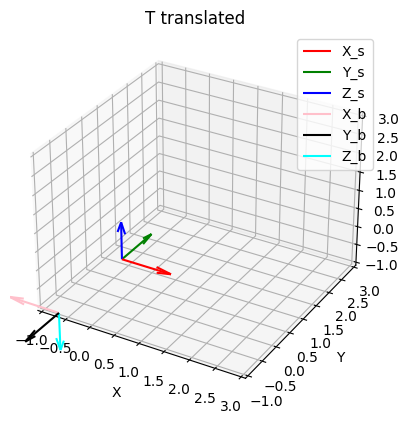

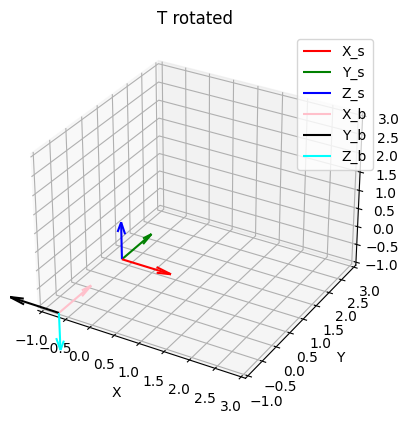

In [22]:
# Plotting the transformation T on the left

T = np.array([[-1, 0, 0, 0],
                [0, -1, 0, 0],
                [0, 0, -1, 0],
                [0, 0, 0, -1]])
plot_frame(T, 'T initial')

# translate 2 units by the y axis of the frame
T[1, 3] = -2

plot_frame(T, 'T translated')

# rotate 90 degrees around the z axis of frame T
T[:3, :3] = np.array([[0, 1, 0],
                        [-1, 0, 0],
                        [0, 0, -1]])


plot_frame(T, 'T rotated')




In summary if the transformation is applied on the right, the vectors p and $\hat{\omega}$ are considered to be in the local frame $b\prime\prime$, and if the transformation is applied on the left, the vectors p and $\hat{\omega}$ are considered to be in the space frame $b\prime$.

## Twists

In robotics and rigid-body mechanics, the concept of twists is used to represent the instantaneous motion of a rigid body. 

We know from the past section a transformation matrix T can be used to represent the configuration of a body from one reference frame to another. Now we want to represent the velocity of a body at a specific point in time. Just as the time derivative of a rotation matrix was not our desired angular velocity, the time derivative of a transformation matrix is not our desired velocity. Instead, we will use the twist representation to describe the instantaneous motion of a body.

A twist represents the velocity of a rigid body, which consists of both rotational and translational motion. It is commonly used in robotics and kinematics to describe the instantaneous motion of a body at a specific point in time.

### Screw Axis

At any given instant, a rigid-body motion can be thought of as twisting about a specific axis known as the *screw axis*. The screw axis is defined by three parameters:

- **Point on the Axis (q)**: A point q located on the axis around which the body is rotating and translating.
- **Direction Vector (s)**: A unit vector s indicating the direction of the screw axis.
- **Pitch (h)**: The pitch h represents the ratio of linear speed along the screw axis to the angular speed about the axis.

### Twist Representation

The twist representation consists of a 6-vector, comprising two 3-vectors:

- **Angular Velocity (S_omega)**: A 3-dimensional vector representing the angular velocity of the body. It describes how fast the body rotates about the screw axis.
- **Linear Velocity (S_v)**: A 3-dimensional vector representing the linear velocity of a point located at the origin of the reference frame. It is the velocity due to both translational and rotational motion.

The screw is typically represented as $$S = \begin{bmatrix} S_{\omega} \\ S_{v} \end{bmatrix} = \begin{bmatrix} angular \ velocity \ when \ \dot{\theta} = 1 \\ linear \ velocity  \ of \ the \ origin \ when \ \dot{\theta} = 1 \end{bmatrix}$$

Multiplying our representation of the screw axis S by the scalar $\dot{\theta}$ gives us the twist the full representation of angular and linear velocities.

$$v = \dot{\theta} S = \begin{bmatrix} w \\ v \end{bmatrix} $$



### Twist Example - Pure Rotation (Zero Pitch Screw)

Let's consider a simple example where the screw axis has a zero pitch, representing a pure rotation like a turntable. The axis is pointing toward you, out of your screen.

In this case, the angular velocity S_omega is [0, 0, 1], indicating rotation about the z-axis. Since the reference frame is 2 units from the screw axis, the linear velocity at the frame origin S_v is [0, -2, 0]. If we choose another location on the refrance frame, the angular velocity will remain the same, but the linear velocity will change. Finally, if we choose a point on the screw axis, the linear velocity will be zero, because the frame has a diffrent orientation from before, the angular velocity is now 1 in the minus y direction.


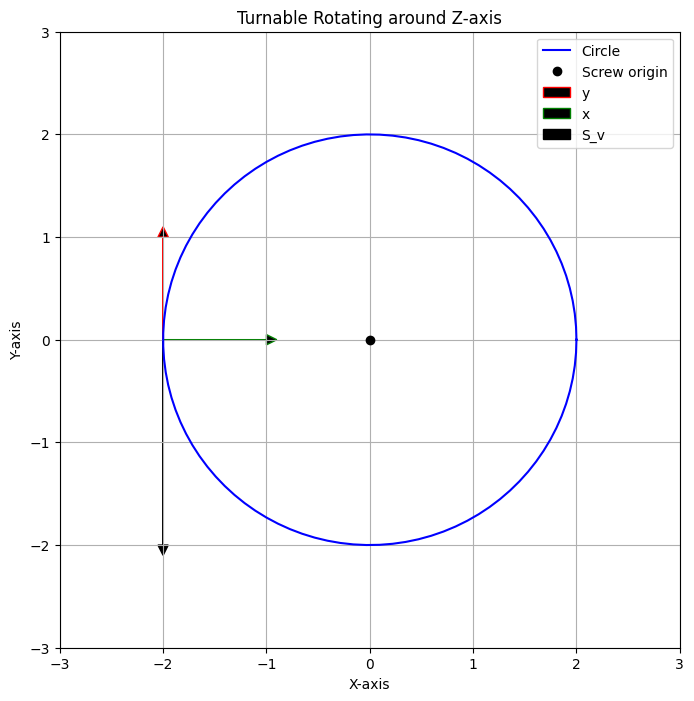

In [21]:
# plot of the turnable

import numpy as np
import matplotlib.pyplot as plt

# Twist parameters for pure rotation
S_omega = np.array([0, 0, 1])  # Angular velocity around the z-axis
S_v = np.array([0, -2, 0])     # Linear velocity at the frame origin

# Create a 2D plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the circle in the screw frame
circle_radius = 2
circle_center = np.array([0, 0])
theta = np.linspace(0, 2 * np.pi, 100)
circle_x = circle_center[0] + circle_radius * np.cos(theta)
circle_y = circle_center[1] + circle_radius * np.sin(theta)
ax.plot(circle_x, circle_y, color='b', label='Circle')
# Plot the origin of the screw frame
ax.plot(0, 0, 'ko', label='Screw origin')
# Plot the vectors y, x, and S_v as arrows
arrow_scale = 0.5
ax.arrow(-2, 0, 0, 1, head_width=0.1, head_length=0.1, fc='k', ec='r', label='y')
ax.arrow(-2, 0, 1, 0, head_width=0.1, head_length=0.1, fc='k', ec='g', label='x')
ax.arrow(-2, 0, S_v[0], S_v[1], head_width=0.1, head_length=0.1, fc='k', ec='k', label='S_v')
# Set axis limits and labels
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

# Set the title and legend
ax.set_title('Turnable Rotating around Z-axis')
ax.legend()

plt.grid()
# Show the plot
plt.show()



We have been focusing on the case where the screw axis has finite pitch, but there is another case where the pitch is infinite. 

If the pitch is infinite, the motion is a pure translation. In this case, the twist is a pure translation, with no rotation. In this case, $S_{\omega}$ is zero, $S_{v}$ is 1 and $\dot{\theta}$ indicates the speed of the translation.

$$
S_{\omega} = 0 \\
||S_{v}|| = 1 \\
\dot{\theta} = \text{speed of translation}
$$

If the pitch is finite, $S_{\omega}$ is a unit vector and $\dot{\theta}$ indicates the speed of rotation in radians per second.

$$
||S_{\omega}|| = 1 \\
\dot{\theta} = \text{speed of rotation}
$$

If the screw axis S is expressed in oordinates of the body frame {b}, then the twist is called a body twist. If the screw axis S is expressed in coordinates of the space frame {s}, then the twist is called a space twist.

$$
\text{If S is expressed in {b}, } V_{b} = (\omega_{b}, v_{b}) = S\dot{\theta} \ \text{is a body twist} \\
\text{If S is expressed in {s}, } V_{s} = (\omega_{s}, v_{s}) = S\dot{\theta} \ \text{is a space twist}
$$

Both the body twist and the space twist are valid representations of the same motion, just expressed in different frames. The body twist is not affected by the choice of the space frame, and the space twist is not affected by the choice of the body frame.

The twist representation is a powerful tool in robotics and rigid-body mechanics to describe the instantaneous motion of a body. It captures both angular and linear velocities in a compact and consistent way. Twists provide a clear and concise representation of a body's motion, making them a fundamental concept in kinematics and robotics.